In [ ]:
%%bash
bowtie2-build chr19.fa /Users/cmdb/qbb2020-answers/quantbio/week5/chr19

In [ ]:
%%bash
in [~/qbb2020-answers/quantbio/week5/g1e]
for sample in CTCF_ER4 CTCF_G1E
> do
> bowtie2 -x /Users/cmdb/qbb2020-answers/quantbio/week5/chr19_index/chr19 -U ${sample}.fastq -S ${sample}.sam -p 6
> samtools view -bSo ${sample}.bam ${sample}.sam
>  samtools sort ${sample}.bam -o ${sample}.sorted.bam
> samtools index ${sample}.sorted.bam
> done


In [ ]:
for sample in input_ER4 input_G1E
> do
> bowtie2 -x /Users/cmdb/qbb2020-answers/quantbio/week5/chr19_index/chr19 -U ${sample}.fastq -S ${sample}.sam -p 6
> samtools view -bSo ${sample}.bam ${sample}.sam
>  samtools sort ${sample}.bam -o ${sample}.sorted.bam
> samtools index ${sample}.sorted.bam
> done

In [ ]:
macs2 callpeak -t CTCF_ER4.bam  -c input_ER4.bam --format=BAM --name=ER4 --gsize=61000000 --tsize=36
macs2 callpeak -t CTCF_G1E.bam  -c input_G1E.bam --format=BAM --name=G1E --gsize=61000000 --tsize=36

In [ ]:
bedtools intersect -v -a ER4_peaks.narrowPeak -b G1E_peaks.narrowPeak > gained_sites.bed
bedtools intersect -v -a G1E_peaks.narrowPeak -b ER4_peaks.narrowPeak > lost_sites.bed

In [ ]:
bedtools intersect -wa -wb -a Mus_musculus.GRCm38.94_features.bed -b G1E_peaks.narrowPeak ER4_peaks.narrowPeak > overlaps.bed

In [ ]:
cut -f 4 |sort -f 4 | sort |uniq -c overlaps.bed > feature_cell

In [ ]:
bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b ER4_peaks.narrowPeak | cut -f 4 |sort -f 4 | sort |uniq -c > ER4overlaps.bed
bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b G1E_peaks.narrowPeak | cut -f 4 |sort -f 4 | sort |uniq -c > G1Eoverlaps.bed

In [ ]:
bedtools intersect -a Mus_musculus.GRCm38.94_features.bed -b ER4_peaks.narrowPeak > ER4overlaps.bed

In [5]:
ER4 = open("/Users/cmdb/qbb2020-answers/quantbio/week5/g1e/ER4overlaps.bed", "r")
G1E = open("/Users/cmdb/qbb2020-answers/quantbio/week5/g1e/G1Eoverlaps.bed", "r")

ER4_exon = 0
ER4_intron = 0
ER4_prom = 0
G1E_exon = 0
G1E_intron = 0
G1E_prom = 0

for i in ER4:
    fields = i.rstrip('n\r').split('\t')
    if "exon" in fields:
        ER4_exon +=1
    if "intron" in fields:
        ER4_intron +=1
    if "promoter" in fields:
        ER4_prom +=1
        
for i in G1E:
    fields = i.rstrip('n\r').split('\t')
    if "exon" in fields:
        G1E_exon +=1
    if "intron" in fields:
        G1E_intron +=1
    if "promoter" in fields:
        G1E_prom +=1


In [6]:
print(ER4_exon)

101


In [7]:
print(ER4_intron)

341


In [8]:
print(ER4_prom)

67


In [9]:
print(G1E_exon)

84


In [10]:
print(G1E_intron)

307


In [11]:
print(G1E_prom)

54


In [13]:
G1E1 = [G1E_exon, G1E_intron, G1E_prom]
ER4 = [ER4_exon, ER4_intron, ER4_prom]
print(GLE1, ER4)

[84, 307, 54] [101, 341, 67]


In [18]:
import numpy as np
import matplotlib.pyplot as plt 

data = {'C':20, 'C++':15, 'Java':30,  
        'Python':35} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Type of DNA')

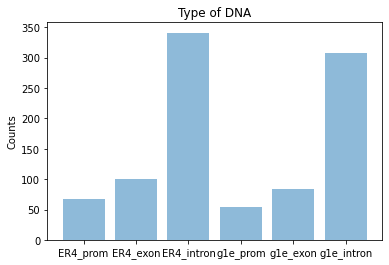

In [20]:
objects = ('ER4_prom', 'ER4_exon', "ER4_intron", "g1e_prom", "g1e_exon", "g1e_intron")
y_pos = np.arange(len(objects))
value = [ER4_prom, ER4_exon, ER4_intron, G1E_prom, G1E_exon, G1E_intron]
plt.bar(y_pos, value, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Type of DNA')

In [22]:
%%bash
wc -l /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/gained_sites.bed

     124 /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/gained_sites.bed


In [23]:
%%bash
wc -l /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/lost_sites.bed

      57 /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/lost_sites.bed


In [ ]:
objects = ('ER4_prom', 'ER4_exon', "ER4_intron", "g1e_prom", "g1e_exon", "g1e_intron")
y_pos = np.arange(len(objects))
value = [ER4_prom, ER4_exon, ER4_intron, G1E_prom, G1E_exon, G1E_intron]
plt.bar(y_pos, value, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Type of DNA')

In [ ]:
#Part 2

In [ ]:
sort -r -k 5 ER4_peaks.narrowPeak | head -n 100 > ER4_top_peaks

In [ ]:
bedtools getfasta -fi /Users/cmdb/qbb2020-answers/quantbio/week5/chr19.fa -bed /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/ER4_top_peaks > /Users/cmdb/qbb2020-answers/quantbio/week5/g1e/sorterER4_peaks.fa

In [ ]:
meme-chip -meme-maxw 20 -oc meme_chip sorterER4_peaks.fa